In [1]:
import numpy as np
import pandas as pd
get_ipython().magic('matplotlib inline')
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
from tensorflow import keras


from os import listdir
from os.path import isfile, join

In [2]:
fname ='letter-recognition.data.csv'
file = fname
data = pd.read_csv(file, header=None)
data = data.dropna()
data.columns = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']

In [3]:
data.describe()

x1            x2            x3           x4            x5  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

                 x6            x7            x8            x9           x10  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

               x11           x12           x13           x14           x15  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

               x16  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [4]:
data.label = [ord(item) - ord('A') for item in data.label]

In [5]:
data.head()

label  x1  x2  x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  \
0     19   2   8   3   5   1   8  13   0   6    6   10    8    0    8    0   
1      8   5  12   3   7   2  10   5   5   4   13    3    9    2    8    4   
2      3   4  11   6   8   6  10   6   2   6   10    3    7    3    7    3   
3     13   7  11   6   6   3   5   9   4   6    4    4   10    6   10    2   
4      6   2   1   3   1   1   8   6   6   6    6    5    9    1    7    5   

   x16  
0    8  
1   10  
2    9  
3    8  
4   10

In [6]:
data.describe()

label            x1            x2            x3           x4  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.00000   
mean      12.516750      4.023550      7.035500      5.121850      5.37245   
std        7.502175      1.913212      3.304555      2.014573      2.26139   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        6.000000      3.000000      5.000000      4.000000      4.00000   
50%       13.000000      4.000000      7.000000      5.000000      6.00000   
75%       19.000000      5.000000      9.000000      6.000000      7.00000   
max       25.000000     15.000000     15.000000     15.000000     15.00000   

                 x5            x6            x7            x8            x9  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       3.505850      6.897600      7.500450      4.628600      5.178650   
std        2.190458      2.026035      2.325354      2.699968      2.380823   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      6.000000      6.000000      3.000000      4.000000   
50%        3.000000      7.000000      7.000000      4.000000      5.000000   
75%        5.000000      8.000000      9.000000      6.000000      7.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

                x10          x11           x12           x13           x14  \
count  20000.000000  20000.00000  20000.000000  20000.000000  20000.000000   
mean       8.282050      6.45400      7.929000      3.046100      8.338850   
std        2.488475      2.63107      2.080619      2.332541      1.546722   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%        7.000000      5.00000      7.000000      1.000000      8.000000   
50%        8.000000      6.00000      8.000000      3.000000      8.000000   
75%       10.000000      8.00000      9.000000      4.000000      9.000000   
max       15.000000     15.00000     15.000000     15.000000     15.000000   

                x15          x16  
count  20000.000000  20000.00000  
mean       3.691750      7.80120  
std        2.567073      1.61747  
min        0.000000      0.00000  
25%        2.000000      7.00000  
50%        3.000000      8.00000  
75%        5.000000      9.00000  
max       15.000000     15.00000

In [7]:
float_data = np.array(data)

In [8]:
float_data = float_data[:,1:]

In [9]:
float_data.shape

(20000, 16)

In [10]:
mean = float_data[:10000].mean(axis=0)

In [11]:
float_data = float_data -mean

In [12]:
std = float_data[:10000].std(axis=0)

In [13]:
float_data = float_data/std

In [14]:
x_train = float_data[:10000]

In [15]:
x_test = float_data[10000:]

In [16]:
x_train.shape, x_test.shape

((10000, 16), (10000, 16))

In [17]:
label = data.label

In [18]:
y_train = label[:10000]
y_test = label[10000:]
y_train.shape, y_test.shape

((10000,), (10000,))

In [19]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(128, activation='', input_shape=(,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(, activation=''))

model.compile(optimizer='rmsprop',
              loss='',
              metrics=['accuracy'])
history = model.fit(x_train,
          y_train,
          epochs=300,
          batch_size=64,
          validation_split=0.2)

Using TensorFlow backend.


Train on 8000 samples, validate on 2000 samples
Epoch 1/300
8000/8000 [==============================] - 0s 42us/step - loss: 2.2212 - accuracy: 0.3943 - val_loss: 1.4045 - val_accuracy: 0.6290
Epoch 2/300
8000/8000 [==============================] - 0s 20us/step - loss: 1.2838 - accuracy: 0.6146 - val_loss: 1.0185 - val_accuracy: 0.7060
Epoch 3/300
8000/8000 [==============================] - 0s 20us/step - loss: 1.0543 - accuracy: 0.6799 - val_loss: 0.8698 - val_accuracy: 0.7440
Epoch 4/300
8000/8000 [==============================] - 0s 21us/step - loss: 0.9206 - accuracy: 0.7160 - val_loss: 0.7571 - val_accuracy: 0.7800
Epoch 5/300
8000/8000 [==============================] - 0s 20us/step - loss: 0.8233 - accuracy: 0.7412 - val_loss: 0.7053 - val_accuracy: 0.7830
Epoch 6/300
8000/8000 [==============================] - 0s 20us/step - loss: 0.7613 - accuracy: 0.7659 - val_loss: 0.6262 - val_accuracy: 0.8125
Epoch 7/300
8000/8000 [==============================] - 0s 21us/step - loss

Epoch 112/300
8000/8000 [==============================] - 0s 19us/step - loss: 0.1470 - accuracy: 0.9504 - val_loss: 0.1745 - val_accuracy: 0.9430
Epoch 113/300
8000/8000 [==============================] - 0s 22us/step - loss: 0.1387 - accuracy: 0.9519 - val_loss: 0.1741 - val_accuracy: 0.9445
Epoch 114/300
8000/8000 [==============================] - 0s 18us/step - loss: 0.1352 - accuracy: 0.9557 - val_loss: 0.1667 - val_accuracy: 0.9455
Epoch 115/300
8000/8000 [==============================] - 0s 18us/step - loss: 0.1356 - accuracy: 0.9535 - val_loss: 0.1629 - val_accuracy: 0.9435
Epoch 116/300
8000/8000 [==============================] - 0s 20us/step - loss: 0.1332 - accuracy: 0.9553 - val_loss: 0.1703 - val_accuracy: 0.9450
Epoch 117/300
8000/8000 [==============================] - 0s 20us/step - loss: 0.1363 - accuracy: 0.9539 - val_loss: 0.1638 - val_accuracy: 0.9460
Epoch 118/300
8000/8000 [==============================] - 0s 20us/step - loss: 0.1337 - accuracy: 0.9542 - val_

8000/8000 [==============================] - 0s 18us/step - loss: 0.1021 - accuracy: 0.9655 - val_loss: 0.1800 - val_accuracy: 0.9490
Epoch 223/300
8000/8000 [==============================] - 0s 18us/step - loss: 0.1061 - accuracy: 0.9676 - val_loss: 0.1861 - val_accuracy: 0.9475
Epoch 224/300
8000/8000 [==============================] - 0s 18us/step - loss: 0.1260 - accuracy: 0.9615 - val_loss: 0.1811 - val_accuracy: 0.9470
Epoch 225/300
8000/8000 [==============================] - 0s 18us/step - loss: 0.1054 - accuracy: 0.9661 - val_loss: 0.1689 - val_accuracy: 0.9485
Epoch 226/300
8000/8000 [==============================] - 0s 18us/step - loss: 0.1131 - accuracy: 0.9641 - val_loss: 0.1804 - val_accuracy: 0.9485
Epoch 227/300
8000/8000 [==============================] - 0s 17us/step - loss: 0.1108 - accuracy: 0.9620 - val_loss: 0.1716 - val_accuracy: 0.9490
Epoch 228/300
8000/8000 [==============================] - 0s 18us/step - loss: 0.1090 - accuracy: 0.9640 - val_loss: 0.1712 -

In [21]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

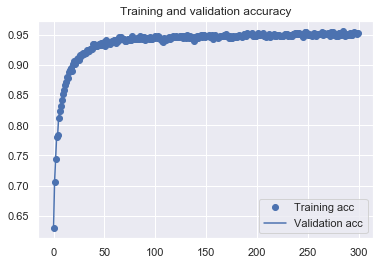

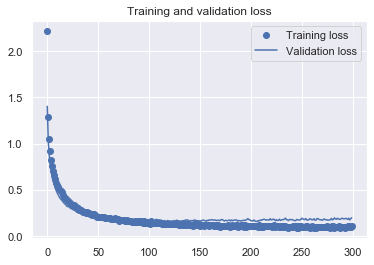

In [22]:
import matplotlib.pyplot as plt

acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 13us/step


In [24]:
test_acc

0.9550999999046326

In [25]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(128, activation='', input_shape=(,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(, activation=''))
model.compile(optimizer='rmsprop',
              loss='',
              metrics=['accuracy'])
history = model.fit(x_train,
          y_train,
          epochs=300,
          batch_size=64)

Epoch 1/300
10000/10000 [==============================] - 0s 33us/step - loss: 2.0473 - accuracy: 0.4285
Epoch 2/300
10000/10000 [==============================] - 0s 18us/step - loss: 1.1896 - accuracy: 0.6436
Epoch 3/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.9809 - accuracy: 0.6980
Epoch 4/300
10000/10000 [==============================] - 0s 17us/step - loss: 0.8455 - accuracy: 0.7408
Epoch 5/300
10000/10000 [==============================] - 0s 18us/step - loss: 0.7610 - accuracy: 0.7660
Epoch 6/300
10000/10000 [==============================] - 0s 19us/step - loss: 0.6946 - accuracy: 0.7852
Epoch 7/300
10000/10000 [==============================] - 0s 18us/step - loss: 0.6326 - accuracy: 0.8048
Epoch 8/300
10000/10000 [==============================] - 0s 17us/step - loss: 0.6007 - accuracy: 0.8110
Epoch 9/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.5565 - accuracy: 0.8241
Epoch 10/300
10000/10000 [====================

10000/10000 [==============================] - 0s 16us/step - loss: 0.1260 - accuracy: 0.9578
Epoch 154/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1260 - accuracy: 0.9572
Epoch 155/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1228 - accuracy: 0.9598
Epoch 156/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1169 - accuracy: 0.9614
Epoch 157/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1239 - accuracy: 0.9577
Epoch 158/300
10000/10000 [==============================] - 0s 15us/step - loss: 0.1247 - accuracy: 0.9582
Epoch 159/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1276 - accuracy: 0.9576
Epoch 160/300
10000/10000 [==============================] - 0s 18us/step - loss: 0.1193 - accuracy: 0.9622
Epoch 161/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1215 - accuracy: 0.9601
Epoch 162/300
10000/10000 [===============

Epoch 229/300
10000/10000 [==============================] - 0s 18us/step - loss: 0.1092 - accuracy: 0.9652
Epoch 230/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1131 - accuracy: 0.9639
Epoch 231/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1201 - accuracy: 0.9597
Epoch 232/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1096 - accuracy: 0.9662
Epoch 233/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1114 - accuracy: 0.9644
Epoch 234/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1156 - accuracy: 0.9626
Epoch 235/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1127 - accuracy: 0.9662
Epoch 236/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1143 - accuracy: 0.9636
Epoch 237/300
10000/10000 [==============================] - 0s 16us/step - loss: 0.1185 - accuracy: 0.9646
Epoch 238/300
10000/10000 [=

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 15us/step


In [27]:
test_acc

0.9616000056266785